# 🏦 Portafoglio Combinato Contrarian: Commodities + Forex

Questo notebook combina le strategie contrarian su commodities e forex in un unico portafoglio equipesato (50% commodities, 50% forex), ribilanciato settimanalmente.

- **Nessuna modifica alla logica delle strategie di base**
- **Ribilanciamento settimanale tra le due componenti**
- **Analisi completa di performance, drawdown e confronto**

---

## 📦 Setup e Importazioni

In [1]:
import sys, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Importa moduli core
from core.commodity_momentum import (
    generate_long_short_commodity_momentum_signals,
    calculate_portfolio_performance
)
from core.data_loader import load_forex_data
from core.signal_generator import generate_momentum_signals
from core.backtest_engine import BacktestEngine

plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11
print('✅ Setup completato!')

✅ Setup completato!


## 📊 Caricamento Dati e Configurazione

- Carichiamo i dati per commodities e forex
- Impostiamo i parametri delle strategie (lookback, top_n, ecc.)

In [2]:
# --- SETUP PARAMETRI PORTAFOGLIO ---
try:
    from ipywidgets import FloatSlider, interact, fixed
    from IPython.display import display
    use_widgets = True
except ImportError:
    use_widgets = False

# Parametri default
commodities_weight = 0.05
forex_weight = 0.95

if use_widgets:
    def set_weights(commodities=0.5, forex=0.5):
        global commodities_weight, forex_weight
        commodities_weight = commodities
        forex_weight = forex
        print(f"Allocazione impostata: Commodities {commodities_weight*100:.0f}% | Forex {forex_weight*100:.0f}%")
    interact(set_weights,
             commodities=FloatSlider(value=0.5, min=0, max=1, step=0.05, description='Commodities'),
             forex=FloatSlider(value=0.5, min=0, max=1, step=0.05, description='Forex'))
    print("⚠️ Assicurati che la somma sia 1.0 (100%)!")
else:
    # Se non ci sono widget, imposta manualmente qui
    commodities_weight = 0.2  # <--- Modifica qui
    forex_weight = 0.8        # <--- Modifica qui
    print(f"Allocazione impostata: Commodities {commodities_weight*100:.0f}% | Forex {forex_weight*100:.0f}%")

# Caricamento dati commodities
commodities_df = pd.read_parquet('../data/commodities_extended_data.parquet')
lookback_commodities = 30
commodities_top_n = 3
rebalance_weekday = 4  # venerdì

# Caricamento dati forex
forex_df = load_forex_data('../data/forex_extended_data.parquet')
lookback_forex = 30
forex_top_n = 3

print(f'✅ Dati caricati. Commodities lookback: {lookback_commodities}, top_n: {commodities_top_n}')
print(f'✅ Dati caricati. Forex lookback: {lookback_forex}, top_n: {forex_top_n}')

Allocazione impostata: Commodities 20% | Forex 80%
✓ Loaded forex data: 6667 days, 154 columns
✓ Date range: 2000-01-03 to 2025-08-03
✅ Dati caricati. Commodities lookback: 30, top_n: 3
✅ Dati caricati. Forex lookback: 30, top_n: 3
✓ Loaded forex data: 6667 days, 154 columns
✓ Date range: 2000-01-03 to 2025-08-03
✅ Dati caricati. Commodities lookback: 30, top_n: 3
✅ Dati caricati. Forex lookback: 30, top_n: 3


## 🔄 Generazione Segnali Contrarian

- Generiamo i segnali contrarian per commodities e forex separatamente, senza modificare la logica originale.

In [3]:
# Segnali contrarian commodities
signals_momentum_commodities = generate_long_short_commodity_momentum_signals(
    commodities_df, lookback_days=lookback_commodities, top_n=commodities_top_n, rebalance_weekday=rebalance_weekday
)
signals_contrarian_commodities = signals_momentum_commodities * -1

# Segnali contrarian forex
signals_momentum_forex = generate_momentum_signals(
    price_data=forex_df,
    lookback_days=lookback_forex,
    top_n=forex_top_n,
    rebalance_freq='weekly'
)
signals_contrarian_forex = signals_momentum_forex * -1

print('✅ Segnali contrarian generati per commodities e forex!')

✓ Generated momentum signals: 30d lookback, 3 long + 3 short
✓ Rebalancing: weekly
✓ Signal range: 2000-01-03 to 2025-08-03
✅ Segnali contrarian generati per commodities e forex!


## 🚀 Backtest Strategie Contrarian Separate

- Eseguiamo il backtest delle strategie contrarian commodities e forex separatamente, mantenendo la logica originale.

In [4]:
# Backtest commodities contrarian
contrarian_equity_commodities = calculate_portfolio_performance(signals_contrarian_commodities, commodities_df)
contrarian_returns_commodities = contrarian_equity_commodities.pct_change().fillna(0)

# Backtest forex contrarian
engine_contrarian_forex = BacktestEngine(initial_capital=100000, leverage=1.0)
results_contrarian_forex = engine_contrarian_forex.run_backtest(forex_df, signals_contrarian_forex, verbose=False)
contrarian_equity_forex = engine_contrarian_forex.portfolio_value
contrarian_returns_forex = engine_contrarian_forex.portfolio_returns

print('✅ Backtest completato per entrambe le strategie!')

INFO:core.backtest_engine:BacktestEngine initialized with 100,000 starting capital
INFO:core.backtest_engine:Detected 22 currency pairs
INFO:core.backtest_engine:Detected 22 currency pairs


INFO:core.backtest_engine:Price data range: 2000-01-03 00:00:00+00:00 to 2025-08-03 00:00:00+01:00
INFO:core.backtest_engine:Signals data range: 2000-01-03 00:00:00+00:00 to 2025-08-03 00:00:00+01:00
INFO:core.backtest_engine:Calculating daily returns...
INFO:core.backtest_engine:Signals data range: 2000-01-03 00:00:00+00:00 to 2025-08-03 00:00:00+01:00
INFO:core.backtest_engine:Calculating daily returns...
INFO:core.backtest_engine:Calculated returns for 22 pairs
INFO:core.backtest_engine:Calculated returns for 22 pairs
INFO:core.backtest_engine:Calculating performance metrics...
INFO:core.backtest_engine:Calculating performance metrics...


✅ Backtest completato per entrambe le strategie!


## 🏦 Combinazione Portafoglio Equipesato (50% Commodities, 50% Forex)

- Allineiamo le date delle equity curve
- Combiniamo le due strategie in un portafoglio equipesato, ribilanciato settimanalmente

In [5]:
# Rimuovi i fusi orari dagli indici per allineare le date
commodities_idx = contrarian_equity_commodities.index.tz_localize(None) if contrarian_equity_commodities.index.tz else contrarian_equity_commodities.index
forex_idx = contrarian_equity_forex.index.tz_localize(None) if contrarian_equity_forex.index.tz else contrarian_equity_forex.index

commodities_eq = pd.Series(contrarian_equity_commodities.values, index=commodities_idx)
forex_eq = pd.Series(contrarian_equity_forex.values, index=forex_idx)

# Trova il periodo comune
start_date = max(commodities_eq.index[0], forex_eq.index[0])
end_date = min(commodities_eq.index[-1], forex_eq.index[-1])

print(f"Periodo combinato: {start_date} → {end_date}")

commodities_eq = commodities_eq.loc[start_date:end_date]
forex_eq = forex_eq.loc[start_date:end_date]

print(f"Commodities eq: {commodities_eq.index[0]} → {commodities_eq.index[-1]}, len={len(commodities_eq)}")
print(f"Forex eq: {forex_eq.index[0]} → {forex_eq.index[-1]}, len={len(forex_eq)}")

# Allinea le date (intersection)
common_dates = commodities_eq.index.intersection(forex_eq.index)
print(f"Date comuni trovate: {len(common_dates)}")
print(f"Prime 5 date comuni: {list(common_dates[:5])}")

commodities_eq = commodities_eq.loc[common_dates]
forex_eq = forex_eq.loc[common_dates]

if len(common_dates) < 2:
    print("❌ ERRORE: Non ci sono abbastanza date comuni tra le due equity curve!")
    print(f"Commodities: {commodities_eq.index[0]} → {commodities_eq.index[-1]}")
    print(f"Forex: {forex_eq.index[0]} → {forex_eq.index[-1]}")
    raise ValueError("Non ci sono abbastanza date comuni per combinare le strategie.")

# Normalizza entrambe le equity curve a 1 all'inizio
commodities_eq_norm = commodities_eq / commodities_eq.iloc[0]
forex_eq_norm = forex_eq / forex_eq.iloc[0]

# Portafoglio pesato secondo i parametri scelti
portfolio_eq = (commodities_eq_norm * commodities_weight) + (forex_eq_norm * forex_weight)
portfolio_returns = portfolio_eq.pct_change().fillna(0)

print(f'✅ Portafoglio combinato creato con pesi: Commodities {commodities_weight*100:.0f}%, Forex {forex_weight*100:.0f}%!')

Periodo combinato: 2006-05-17 00:00:00 → 2025-08-03 00:00:00
Commodities eq: 2006-05-17 00:00:00 → 2025-08-01 00:00:00, len=4840
Forex eq: 2006-05-17 00:00:00 → 2025-08-03 00:00:00, len=5007
Date comuni trovate: 4835
Prime 5 date comuni: [Timestamp('2006-05-17 00:00:00'), Timestamp('2006-05-18 00:00:00'), Timestamp('2006-05-19 00:00:00'), Timestamp('2006-05-22 00:00:00'), Timestamp('2006-05-23 00:00:00')]
✅ Portafoglio combinato creato con pesi: Commodities 20%, Forex 80%!


## 📈 Visualizzazione Equity Curve e Performance

- Visualizziamo le equity curve delle singole strategie e del portafoglio combinato
- Calcoliamo e mostriamo le principali metriche di performance

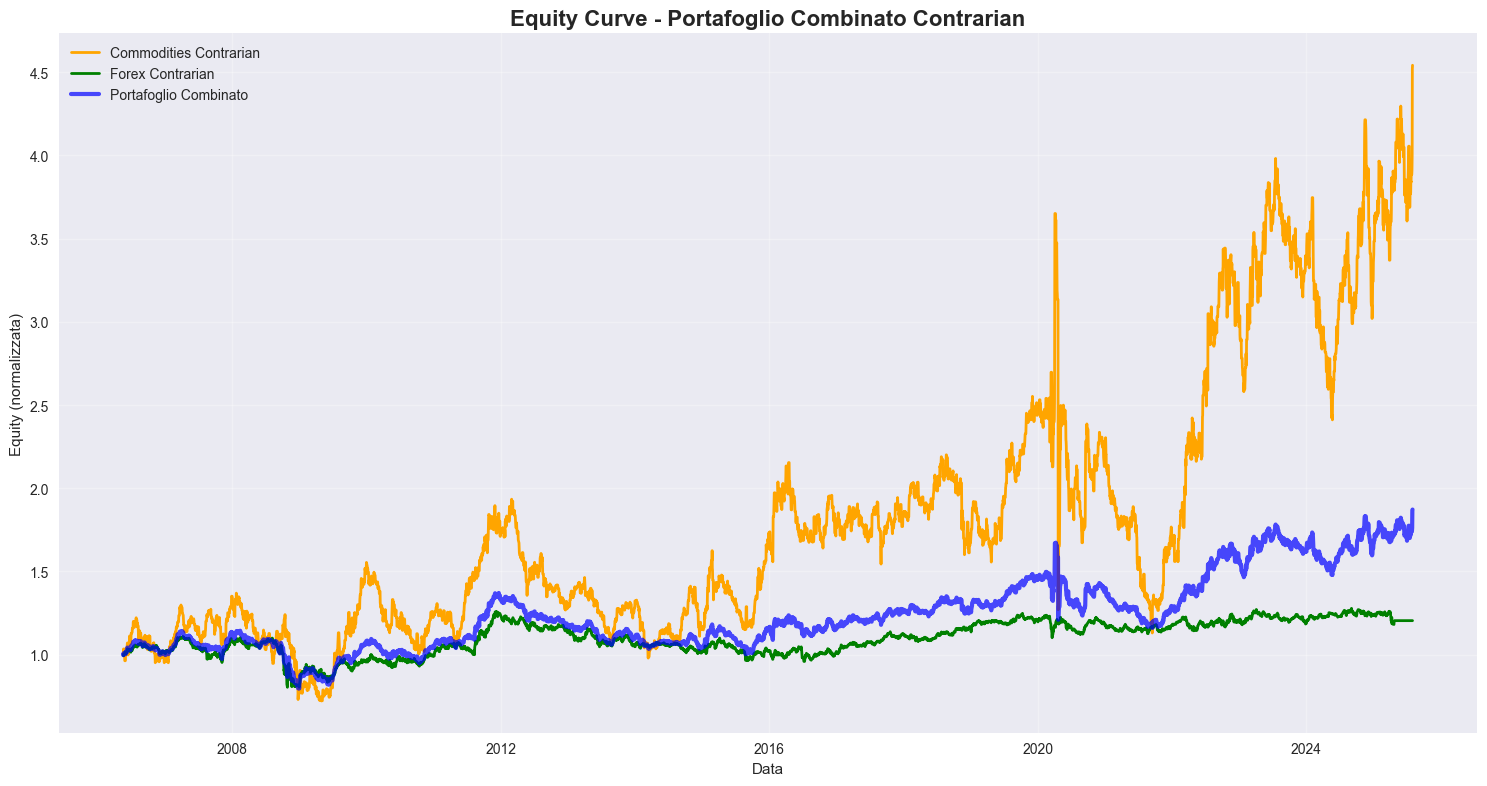

📊 PERFORMANCE PORTAFOGLIO COMBINATO
METRICA            COMBINATO  COMMODITIES        FOREX
------------------------------------------------------------
Totale (%)             87.19       354.09        20.47
Annuale (%)             3.32         8.21         0.98
Volatilità (%)         13.64        35.60        10.42
Sharpe                  0.31         0.42         0.15
Max DD (%)            -30.64       -69.03       -27.46


In [6]:
plt.figure(figsize=(15, 8))
plt.plot(commodities_eq_norm.index, commodities_eq_norm.values, label='Commodities Contrarian', color='orange', linewidth=2)
plt.plot(forex_eq_norm.index, forex_eq_norm.values, label='Forex Contrarian', color='green', linewidth=2)
plt.plot(portfolio_eq.index, portfolio_eq.values, label='Portafoglio Combinato', color='blue', linewidth=3, alpha=0.7)
plt.title('Equity Curve - Portafoglio Combinato Contrarian', fontsize=16, fontweight='bold')
plt.ylabel('Equity (normalizzata)')
plt.xlabel('Data')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calcolo metriche
from collections import OrderedDict

def perf_stats(equity, returns):
    stats = OrderedDict()
    stats['Totale (%)'] = (equity.iloc[-1] - 1) * 100
    stats['Annuale (%)'] = ((equity.iloc[-1] ** (252 / len(equity))) - 1) * 100
    stats['Volatilità (%)'] = returns.std() * np.sqrt(252) * 100
    stats['Sharpe'] = (returns.mean() * 252) / (returns.std() * np.sqrt(252))
    running_max = equity.cummax()
    drawdown = (equity / running_max) - 1
    stats['Max DD (%)'] = drawdown.min() * 100
    return stats

stats_comb = perf_stats(portfolio_eq, portfolio_returns)
stats_com = perf_stats(commodities_eq_norm, commodities_eq_norm.pct_change().fillna(0))
stats_fx = perf_stats(forex_eq_norm, forex_eq_norm.pct_change().fillna(0))

print('📊 PERFORMANCE PORTAFOGLIO COMBINATO')
print('='*60)
print(f"{'METRICA':<15} {'COMBINATO':>12} {'COMMODITIES':>12} {'FOREX':>12}")
print('-'*60)
for k in stats_comb.keys():
    print(f"{k:<15} {stats_comb[k]:>12.2f} {stats_com[k]:>12.2f} {stats_fx[k]:>12.2f}")
print('='*60)

## 📉 Analisi Drawdown e Rolling Metrics

- Analizziamo il drawdown del portafoglio combinato
- Visualizziamo rolling returns, volatilità e Sharpe ratio

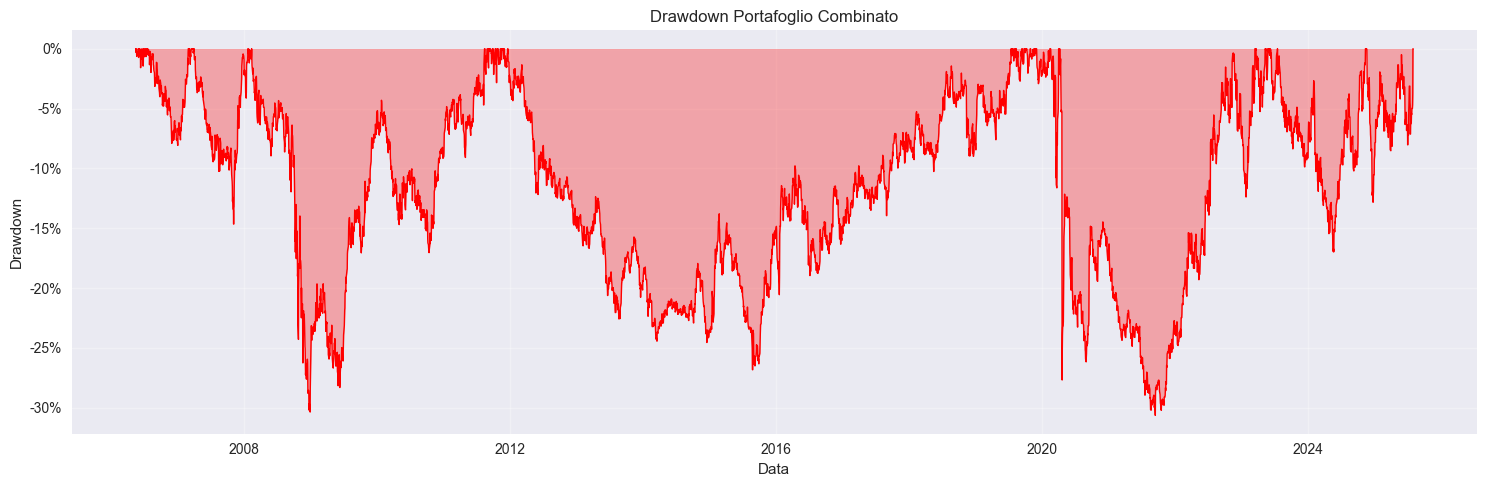

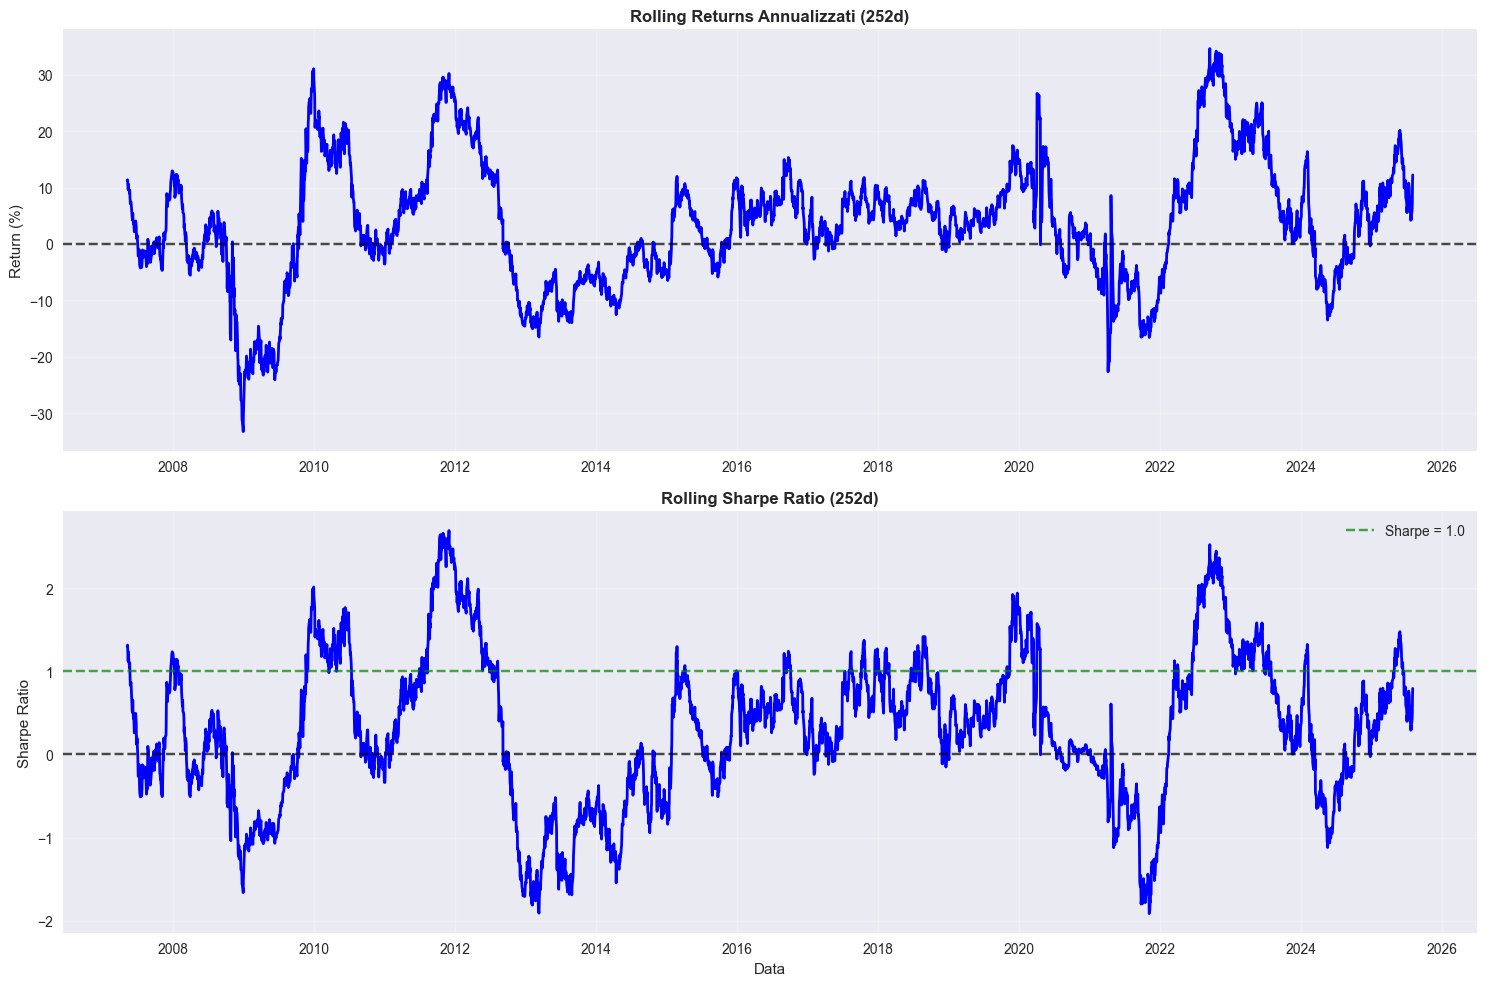

Top 5 Drawdown peggiori:
2021-09-15: -30.64%
2021-09-14: -30.42%
2008-12-30: -30.36%
2021-10-18: -30.22%
2021-08-23: -30.21%


In [7]:
# Drawdown
running_max = portfolio_eq.cummax()
drawdown = (portfolio_eq / running_max) - 1
plt.figure(figsize=(15, 5))
plt.fill_between(drawdown.index, drawdown.values, 0, alpha=0.3, color='red')
plt.plot(drawdown.index, drawdown.values, color='red', linewidth=1)
plt.title('Drawdown Portafoglio Combinato')
plt.xlabel('Data')
plt.ylabel('Drawdown')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Rolling metrics
window = 252  # 1 anno
rolling_ret = portfolio_returns.rolling(window).mean() * 252 * 100
rolling_vol = portfolio_returns.rolling(window).std() * np.sqrt(252) * 100
rolling_sharpe = rolling_ret / rolling_vol

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
ax1.plot(rolling_ret.index, rolling_ret.values, color='blue', linewidth=2)
ax1.axhline(y=0, color='black', linestyle='--', alpha=0.7)
ax1.set_title('Rolling Returns Annualizzati (252d)', fontweight='bold')
ax1.set_ylabel('Return (%)')
ax1.grid(True, alpha=0.3)

ax2.plot(rolling_sharpe.index, rolling_sharpe.values, color='blue', linewidth=2)
ax2.axhline(y=0, color='black', linestyle='--', alpha=0.7)
ax2.axhline(y=1, color='green', linestyle='--', alpha=0.7, label='Sharpe = 1.0')
ax2.set_title('Rolling Sharpe Ratio (252d)', fontweight='bold')
ax2.set_ylabel('Sharpe Ratio')
ax2.set_xlabel('Data')
ax2.legend()
ax2.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print('Top 5 Drawdown peggiori:')
worst_drawdowns = drawdown.nsmallest(5)
for date, dd in worst_drawdowns.items():
    print(f'{date.strftime('%Y-%m-%d')}: {dd:.2%}')

## 📈 Visualizzazione Equity Curve su Scala Logaritmica

- Visualizziamo la curva del portafoglio combinato su scala logaritmica per evidenziare la crescita esponenziale e i drawdown.

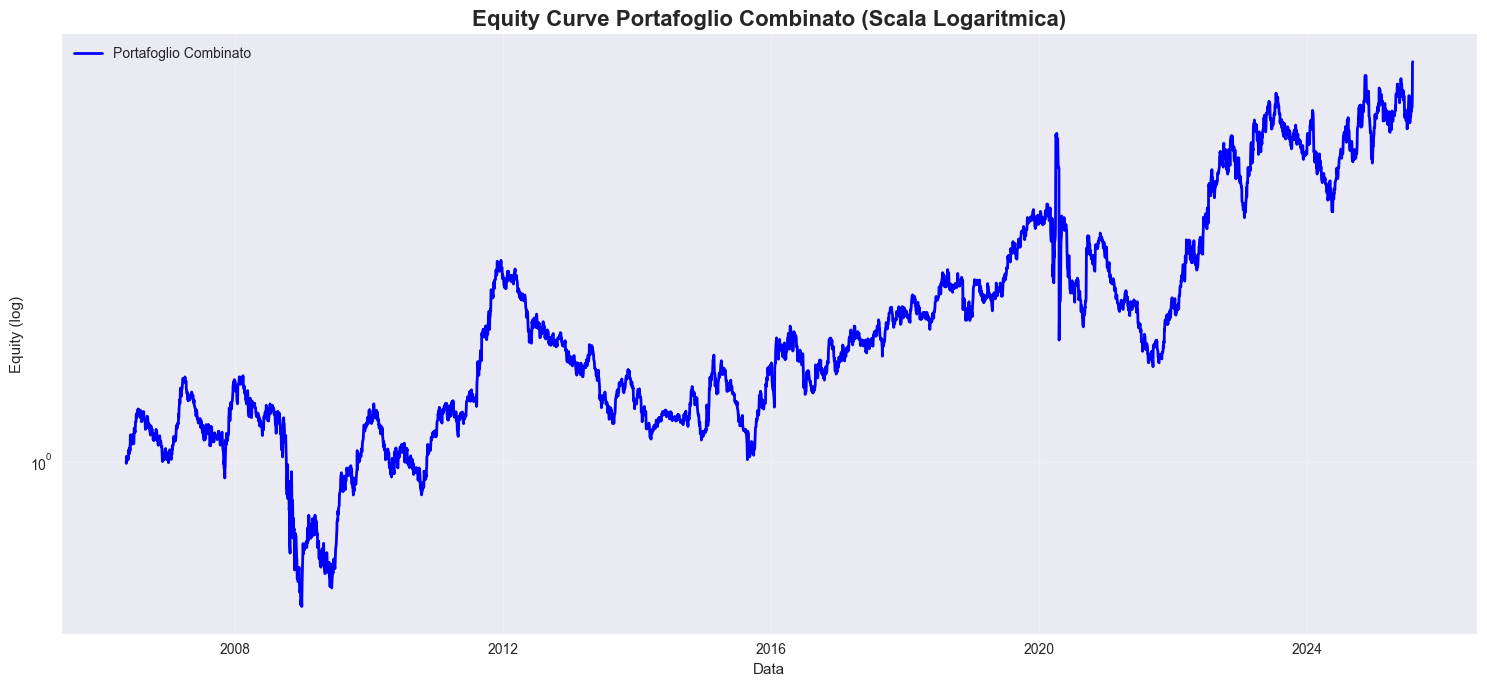

In [8]:
plt.figure(figsize=(15, 7))
plt.plot(portfolio_eq.index, portfolio_eq.values, color='blue', linewidth=2, label='Portafoglio Combinato')
plt.yscale('log')
plt.title('Equity Curve Portafoglio Combinato (Scala Logaritmica)', fontsize=16, fontweight='bold')
plt.xlabel('Data')
plt.ylabel('Equity (log)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 🔗 Rolling Correlazione tra Commodities e Forex

- Calcoliamo e visualizziamo la rolling correlation (finestra 252 giorni) tra le equity curve normalizzate di commodities e forex.

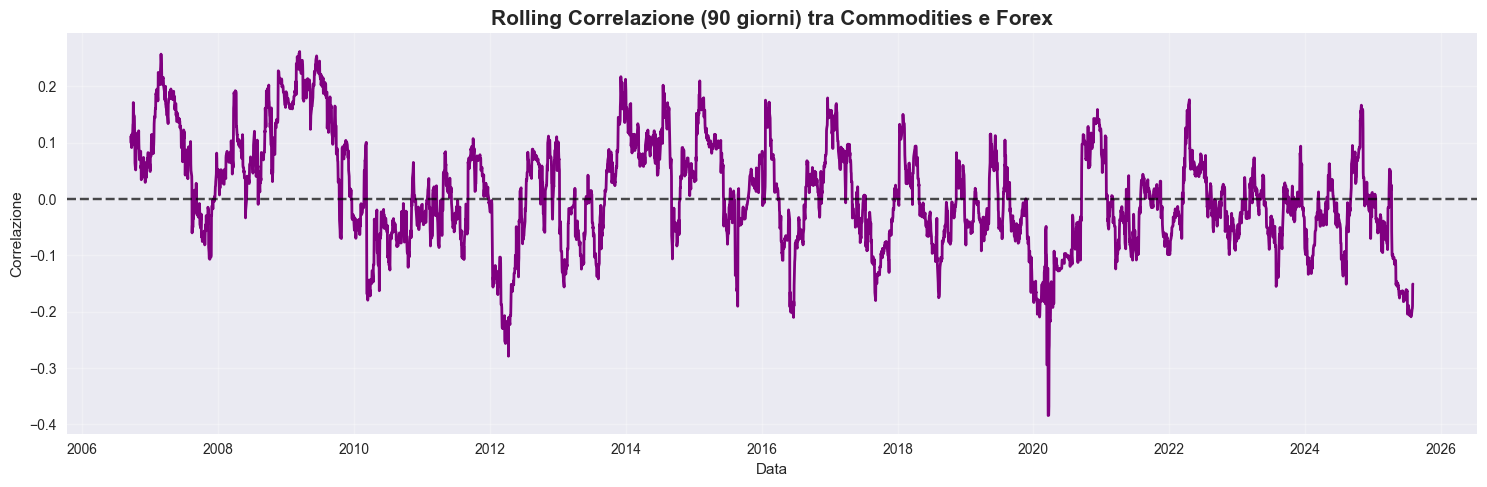

Correlazione media periodo: 0.01


In [9]:
window = 90  # 1 anno
rolling_corr = commodities_eq_norm.pct_change().rolling(window).corr(forex_eq_norm.pct_change())

plt.figure(figsize=(15, 5))
plt.plot(rolling_corr.index, rolling_corr.values, color='purple', linewidth=2)
plt.axhline(y=0, color='black', linestyle='--', alpha=0.7)
plt.title('Rolling Correlazione (90 giorni) tra Commodities e Forex', fontsize=15, fontweight='bold')
plt.xlabel('Data')
plt.ylabel('Correlazione')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f'Correlazione media periodo: {rolling_corr.mean():.2f}')

[*********************100%***********************]  1 of 1 completed



⚠️ Colonna 'Adj Close' non trovata, uso 'Close'. Colonne disponibili: [('Close', 'TLT'), ('High', 'TLT'), ('Low', 'TLT'), ('Open', 'TLT'), ('Volume', 'TLT')]


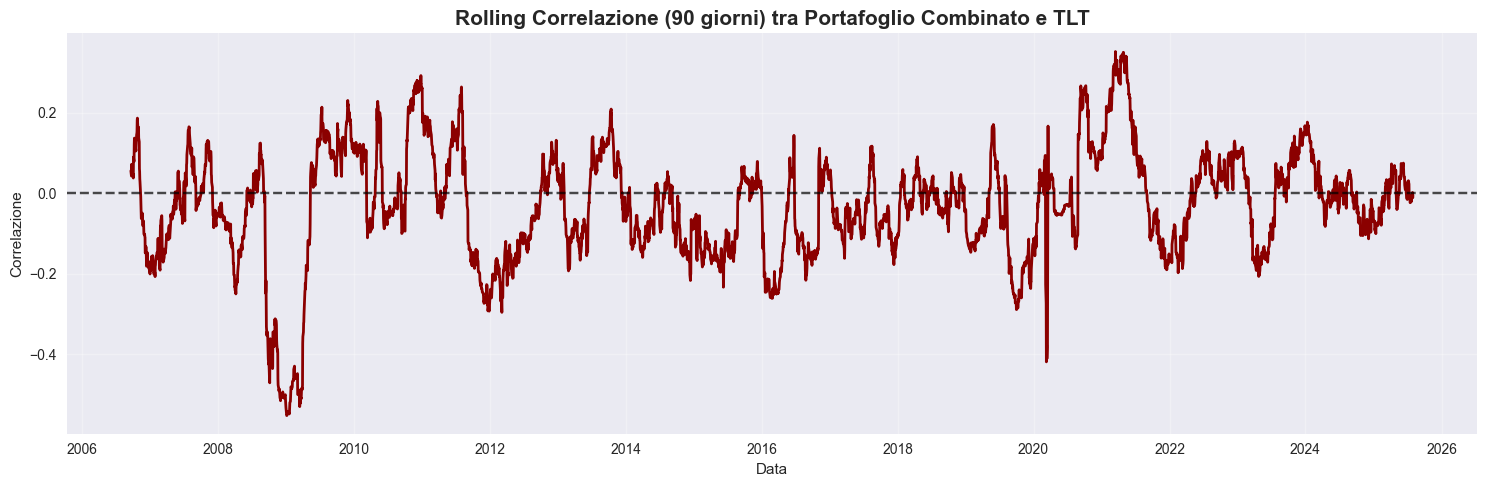

Correlazione media periodo: -0.03


In [13]:
# --- Rolling Correlazione tra Portafoglio Combinato e TLT (ETF Treasury 20+ anni) ---
import yfinance as yf

# Scarica dati TLT (prezzi di chiusura aggiustati o close)
tlt_df = yf.download('TLT', start=portfolio_eq.index[0], end=portfolio_eq.index[-1])
if 'Adj Close' in tlt_df.columns:
    tlt = tlt_df['Adj Close']
elif 'Close' in tlt_df.columns:
    print("⚠️ Colonna 'Adj Close' non trovata, uso 'Close'. Colonne disponibili:", tlt_df.columns.tolist())
    tlt = tlt_df['Close']
else:
    print("❌ ERRORE: né 'Adj Close' né 'Close' trovate. Colonne disponibili:", tlt_df.columns.tolist())
    tlt = None

if tlt is not None and not tlt.empty:
    # Allinea le date con il portafoglio combinato
    tlt = tlt.loc[portfolio_eq.index.intersection(tlt.index)]
    portfolio_eq_aligned = portfolio_eq.loc[tlt.index]

    # Calcola i rendimenti giornalieri
    portfolio_returns_aligned = portfolio_eq_aligned.pct_change().fillna(0)
    tlt_returns = tlt.pct_change().fillna(0)

    # Rolling correlation a 90 giorni
    window = 90
    rolling_corr_tlt = portfolio_returns_aligned.rolling(window).corr(tlt_returns)

    plt.figure(figsize=(15, 5))
    plt.plot(rolling_corr_tlt.index, rolling_corr_tlt.values, color='darkred', linewidth=2)
    plt.axhline(y=0, color='black', linestyle='--', alpha=0.7)
    plt.title('Rolling Correlazione (90 giorni) tra Portafoglio Combinato e TLT', fontsize=15, fontweight='bold')
    plt.xlabel('Data')
    plt.ylabel('Correlazione')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    corr_media = float(rolling_corr_tlt.mean(skipna=True))
    print(f'Correlazione media periodo: {corr_media:.2f}')
else:
    print("❌ ERRORE: Nessun dato valido per TLT scaricato da Yahoo Finance!")